In [1]:
import numpy as np 
import math as m
import random as r 
import matplotlib.pyplot as plt
import matplotlib.colors as col
from scipy.spatial import distance

In [2]:
dim = int(40)
population = int(1400)

gridMatrix = np.zeros((dim,dim))        #Creating a matrix of same size as our grid. This matrix represents our grid

print("\n" + "There are two types of agents i.e X and O in this population." , "\n")
xPercent = float(50)
popuRatio = xPercent/100


There are two types of agents i.e X and O in this population. 



In [3]:
#<===========Start: Assigning initial position of agents on grid randomly===========>
gridList = [x for x in range(1 , (dim*dim)+1)]

xPositions = r.sample(gridList , int(popuRatio*population))     #Cell numbers of all x agents
yPositions = r.sample([x for x in gridList if x not in xPositions] , population-int(popuRatio*population))  #Cell numbers of all y agents
empPositions = [x for x in [x for x in gridList if x not in xPositions] if x not in yPositions]     #Cell numbers of all empty cells

k = 0
for i in range(dim):
    for j in range(dim):
        k += 1
        if(k in xPositions):
            gridMatrix[i][j] = -1           #For agent x, the matrix element will have value -1
        elif(k in yPositions):
            gridMatrix[i][j] = 1            #For agent y, the matrix element will have value 1
#<===========End: Assigning initial position of agents on grid randomly===========>

In [4]:
t = float(input("Enter the similarity threshold of the agents in percent(Sample Input- 4): "))
tolerance = t *10
numEmptyCell = len(empPositions)

Enter the similarity threshold of the agents in percent(Sample Input- 4): 4


In [5]:
#<===========Start: Setting font which will be used later for text in plots===========>
font = {'family': 'serif',
    'color':  'black',
    'weight': 'bold',
    'size': 17,
    }
#<===========End: Setting font which will be used later for text in plots===========>

In [6]:
#<===========Start: Function to display population on a grid===========>
def displayingSystem(title):
    cmap = col.ListedColormap(['red' , 'white', 'blue'])
    plt.figure(figsize=(12,8))
    plt.pcolormesh(gridMatrix , edgecolor='black' , cmap=cmap)

    plt.title(title , fontdict=font)
    plt.show()
#<===========End: Function to display population on a grid===========>

In [8]:
#<===========Start: Function to identify if an agent is satisfied in it's current position or not===========>
def satisfactionCalculator(i , j , same , different):
    if(gridMatrix[i][j] == 0):
        pass
    else:
        neighbourIndex = [[i,j-1] , [i,j+1] , [i-1,j] , [i+1,j] , [i-1,j-1] , [i-1,j+1] , [i+1,j-1] , [i+1,j+1]]
        validIndex = [x for x in neighbourIndex if (0<=x[0]<=dim-1) and (0<=x[1]<=dim-1)]

        for x in validIndex:
            if(gridMatrix[x[0]][x[1]] == gridMatrix[i][j]):
                same += 1
            elif(gridMatrix[x[0]][x[1]] == -gridMatrix[i][j]):
                different += 1
    
    if(same+different != 0):
        return ((same/(same+different)) * 100)
    else:
        return 100
#<===========End: Function to identify if an agent is satisfied in it's current position or not===========>

In [9]:
#<===========Start: Function to switch place of a agent if it is not satisfied===========>
def get_distance(self, other):
    "Computes the chebyshev distance between self and other agent."
    a = (self.location[0] - other.location[0])
    b = (self.location[1] - other.location[1])
    return distance.chebyshev(a, b)

def switchingPlace(u , v):
    gridMatrix[iTemp][jTemp] = gridMatrix[u][v]
    gridMatrix[u][v] = 0

    for q in range(numEmptyCell):
        if(empPositions[q] == switchTemp[0]):
            empPositions[q] = u*dim+v+1

    return gridMatrix , empPositions , iTemp , jTemp
#<===========End: Function to switch place of a agent if it is not satisfied===========>

In [10]:
#<===========Start: Function to calculate percentage of agents which are satisfied===========>
def percentHappy():
    k = 0
    for u in range(dim):
        for v in range(dim):
            if(gridMatrix[u][v] == 0):
                pass
            else:
                satisfy = satisfactionCalculator(u , v , 0 , 0)
                if(satisfy >= tolerance):
                    k += 1
                else:
                    pass
    
    return ((k/population)*100)
#<===========End: Function to calculate percentage of agents which are satisfied===========>

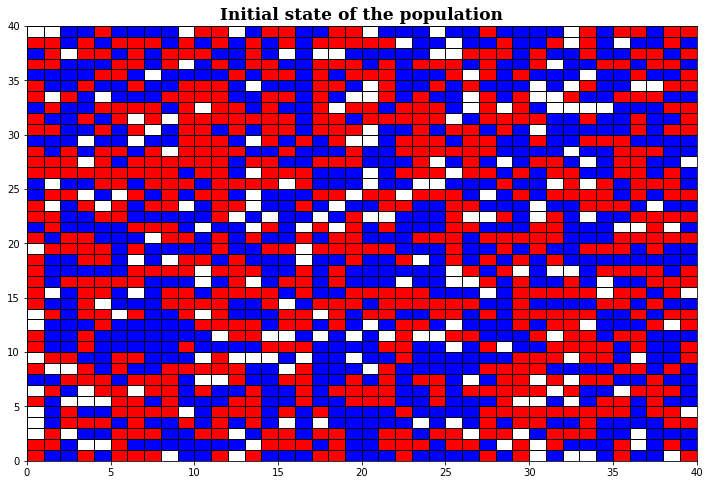

In [11]:
displayingSystem("Initial state of the population")

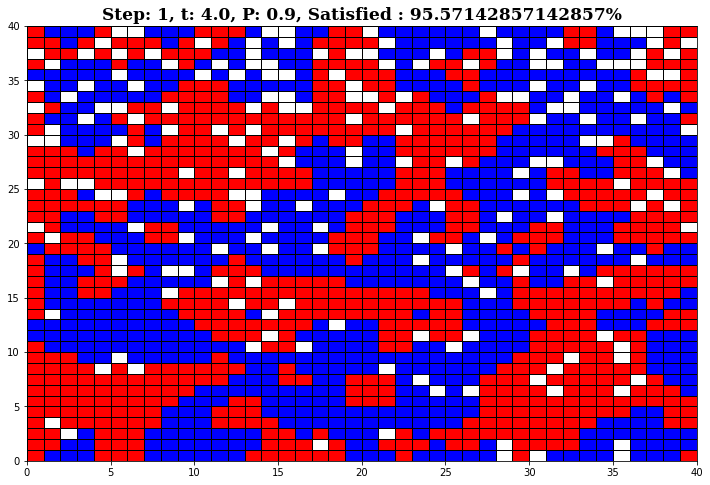

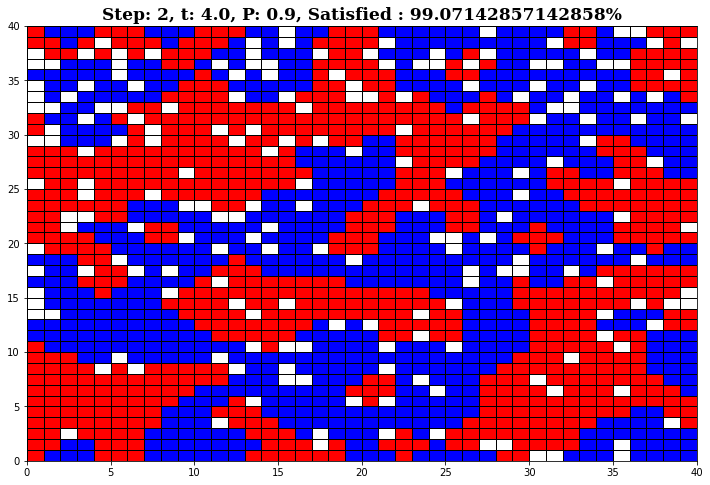

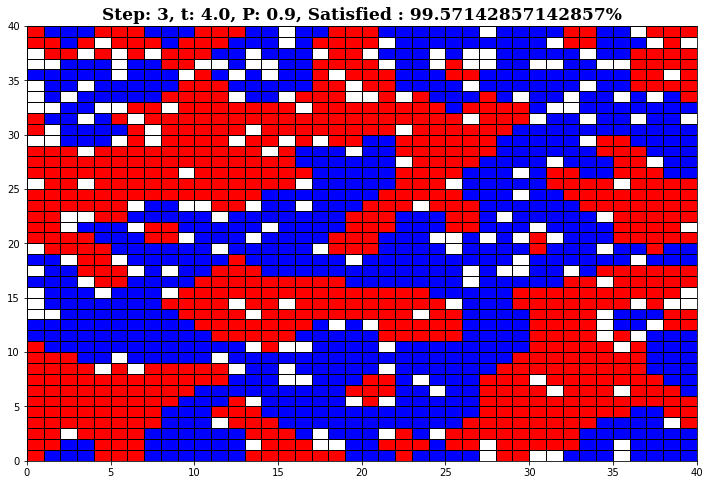

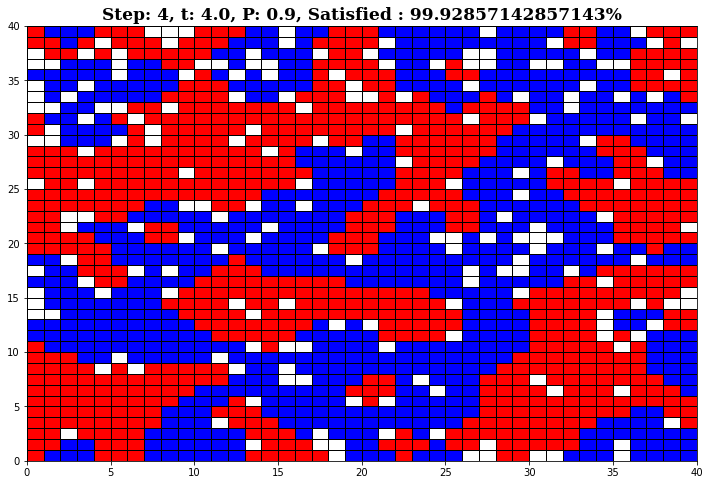

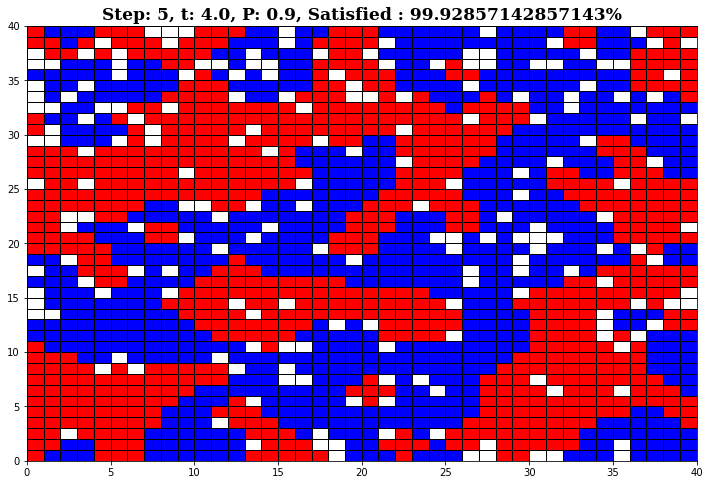

In [12]:

step = 0
happy = 0
happyList = []
happy = percentHappy()    
happyList.append(happy) 
while(step <= 4):    #Limiting the simulation to 4 steps in case all the agents can't get satisfied
   
    for i in range(dim):
        for j in range(dim):
            if(gridMatrix[i][j] == 0):
                pass
            else:
                satisfaction = satisfactionCalculator(i , j , 0 , 0)

                if(satisfaction >= tolerance):
                    pass
                else:
                    satisfactionStatus = 0
                    m , n = i , j
                    mTemp , nTemp = m , n
                    
                    while(satisfactionStatus == 0):
                        switchTemp = r.sample(empPositions , 1)
                        iTemp = (switchTemp[0]-1)//dim
                        jTemp = ((switchTemp[0]-1)%dim)                          

                        if(iTemp == mTemp and jTemp == nTemp):
                            satisfactionStatus = -1

                        else:
                            gridMatrix , empPositions , m , n = switchingPlace(m , n)
                            
                            #print(empPositions)
                            #exit()
                            satisfaction = satisfactionCalculator(m , n , 0 , 0)

                            if(satisfaction >= tolerance):
                                satisfactionStatus = 1
                            else:
                                pass
    
     
    happy = percentHappy()    
    happyList.append(happy)                 
    
    step += 1
    figures = displayingSystem('Step: '+str(step)+', t: '+str(t)+', P: 0.9' +', Satisfied : '+str(happyList[step])+'%')

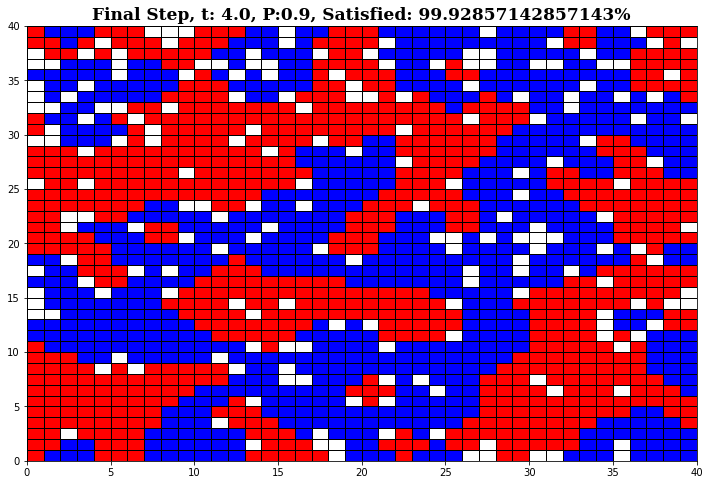

-->Step List<-- 0
---->Satisfication<---- 71.57142857142857
-->Step List<-- 1
---->Satisfication<---- 95.57142857142857
-->Step List<-- 2
---->Satisfication<---- 99.07142857142858
-->Step List<-- 3
---->Satisfication<---- 99.57142857142857
-->Step List<-- 4
---->Satisfication<---- 99.92857142857143
-->Step List<-- 5
---->Satisfication<---- 99.92857142857143


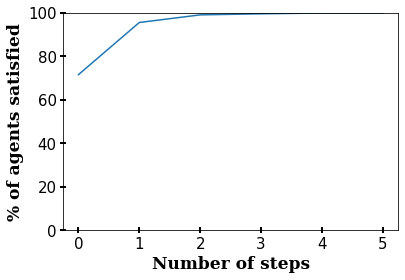

In [13]:
displayingSystem("Final Step"+', t: '+str(t)+', P:0.9'+', Satisfied: '+str(happyList[-1])+'%')

stepList = []
for i in range(len(happyList)):
  stepList.append(i)
  print("-->Step List<--", stepList[i])
  print("---->Satisfication<----", happyList[i])
  
plt.plot(stepList , happyList)

plt.xlabel("Number of steps" , fontdict=font)
plt.ylabel("% of agents satisfied" , fontdict=font)

plt.ylim(0 , 100)
plt.tick_params(direction='inout', length=6, width=2, colors='black', labelsize=15)

    
plt.show()